# Load and visualize the dataset:

With the exception of the the dataset load, none of this section is necessary for using sklearn so I will skip the explanation.

In [1]:
from __future__ import print_function, absolute_import, division

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

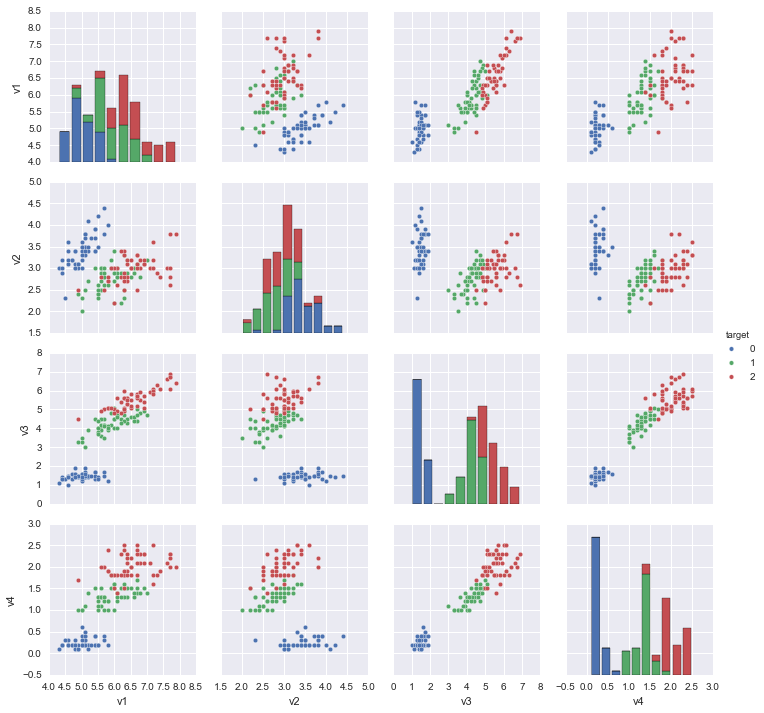

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
colnames = ['v{}'.format(i+1) for i in range(X.shape[1])]
iris_df = pd.DataFrame(data=X, columns=colnames)
iris_df['target'] = y

sns.pairplot(data=iris_df, vars=colnames, hue='target')

# Fit a classifier:

A classifier attempts to fit a function that takes the input vector and decide which class it belongs to. `scikit-learn` has several classifiers to choose from, but we will use the simplest: logistic regression. In the 2-class case, logistic regression fits the function

$$ P(class=1|X) = \frac{1}{1 + e^{f(x)}} $$

with 

$$ f(x) = x_0 + \beta_1x_1 + \beta_2 x_2 + \dots $$

The extension to multiple classes is straightforward, but we'll skip that for brevity

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train a logistic regression function on the training data
clf = LogisticRegression(penalty='l2', C=1, fit_intercept=1, class_weight='balanced')
clf.fit(X_train, y_train)

print('Prediction accuracy on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Prediction accuracy on training set: {:.3f}'.format(clf.score(X_test, y_test)))

Prediction accuracy on training set: 0.955
Prediction accuracy on training set: 0.974


## How does varying C change things?

C is the regularization term, and it penalizes large values of the parameters ($\beta_i$).

Note - for this dataset, the testing score just levels off. In real datasets, it will go back down as C gets bigger because the model begins to over-fit. **Always cross-validate the parameters to avoid overfitting!**

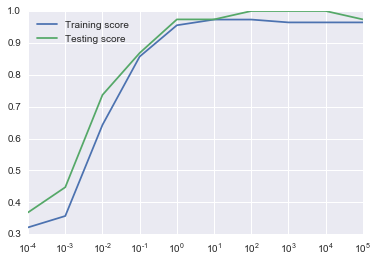

In [4]:
cvalues = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
training_scores = []
testing_scores = []
for c in cvalues:
    clf = LogisticRegression(penalty='l2', C=c, fit_intercept=1, class_weight='balanced')
    clf.fit(X_train, y_train)
    
    training_scores.append(clf.score(X_train, y_train))
    testing_scores.append(clf.score(X_test, y_test))
    
fig, ax = plt.subplots()
ax.plot(cvalues, training_scores, label='Training score')
ax.plot(cvalues, testing_scores, label='Testing score')
ax.legend(loc='best')
ax.set_xscale('log')